# Feature extraction using cp-measure


## Import packages & data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import squidpy as sq
import scanpy as sc
import pandas as pd
import spatialdata as sd
import spatialdata_plot
import numpy as np
import anndata as ad
from spatialdata.models import TableModel
import pycytominer
from pycytominer.operations import RobustMAD
from skimage.draw import disk
import matplotlib.pyplot as plt


## Using labels (f.e. segmentation masks)

In [3]:
# mibitof_sdata = sd.read_zarr("./mibitof.zarr")

mibitof_sdata = sd.read_zarr("/Users/tim.treis/Downloads/mibitof.zarr")
mibitof_sdata

SpatialData object, with associated Zarr store: /Users/tim.treis/Downloads/mibitof.zarr
├── Images
│     ├── 'point8_image': DataArray[cyx] (3, 1024, 1024)
│     ├── 'point16_image': DataArray[cyx] (3, 1024, 1024)
│     └── 'point23_image': DataArray[cyx] (3, 1024, 1024)
├── Labels
│     ├── 'point8_labels': DataArray[yx] (1024, 1024)
│     ├── 'point16_labels': DataArray[yx] (1024, 1024)
│     └── 'point23_labels': DataArray[yx] (1024, 1024)
└── Tables
      └── 'table': AnnData (3309, 36)
with coordinate systems:
    ▸ 'point8', with elements:
        point8_image (Images), point8_labels (Labels)
    ▸ 'point16', with elements:
        point16_image (Images), point16_labels (Labels)
    ▸ 'point23', with elements:
        point23_image (Images), point23_labels (Labels)

In [3]:
for point in ["point8", "point16", "point23"]:

    print(f"Calculating image features for '{point}'")
    sq.exp.calculate_image_features(
        sdata=mibitof_sdata,
        labels_key=f"{point}_labels",
        image_key=f"{point}_image",
        adata_key_added=f"morphology_{point}",
        n_jobs=20,
        show_progress_bar=False,
    )

Calculating image features for 'point8'
INFO     Using '20' core(s).                                                                                       
INFO     Calculating 'skimage' label features.                                                                     
INFO     Calculating 'skimage' image features for channel '0'.                                                     
INFO     Calculating 'skimage' image features for channel '1'.                                                     
INFO     Calculating 'skimage' image features for channel '2'.                                                     
INFO     Calculating 'cpmeasure' core features for channel '0'.                                                    
INFO     Calculating 'cpmeasure' core features for channel '1'.                                                    
INFO     Calculating 'cpmeasure' core features for channel '2'.                                                    
INFO     Calculating 'cpmeasure'

/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


INFO     Calculating 'skimage' image features for channel '0'.                                                     
INFO     Calculating 'skimage' image features for channel '1'.                                                     
INFO     Calculating 'skimage' image features for channel '2'.                                                     
INFO     Calculating 'cpmeasure' core features for channel '0'.                                                    
INFO     Calculating 'cpmeasure' core features for channel '1'.                                                    


/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


INFO     Calculating 'cpmeasure' core features for channel '2'.                                                    


/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


INFO     Calculating 'cpmeasure' correlation features between channels '0' and '1'.                                


/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


INFO     Calculating 'cpmeasure' correlation features between channels '0' and '2'.                                
INFO     Calculating 'cpmeasure' correlation features between channels '1' and '2'.                                
Calculating image features for 'point23'
INFO     Using '20' core(s).                                                                                       
INFO     Calculating 'skimage' label features.                                                                     


/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


INFO     Calculating 'skimage' image features for channel '0'.                                                     
INFO     Calculating 'skimage' image features for channel '1'.                                                     
INFO     Calculating 'skimage' image features for channel '2'.                                                     
INFO     Calculating 'cpmeasure' core features for channel '0'.                                                    
INFO     Calculating 'cpmeasure' core features for channel '1'.                                                    


/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


INFO     Calculating 'cpmeasure' core features for channel '2'.                                                    


/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


INFO     Calculating 'cpmeasure' correlation features between channels '0' and '1'.                                
INFO     Calculating 'cpmeasure' correlation features between channels '0' and '2'.                                
INFO     Calculating 'cpmeasure' correlation features between channels '1' and '2'.                                


/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/scanpy/tools/_utils.py:40: UserWarning: You’re trying to run this on 957 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(
/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)
/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectra

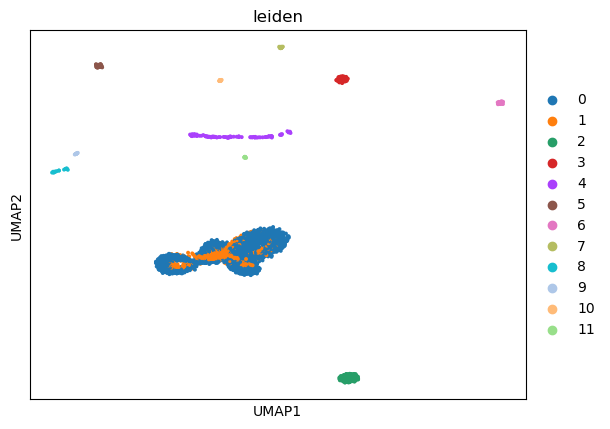

In [6]:
for point in ["point8", "point16", "point23"]:

    mibitof_sdata.tables[f"morphology_{point}"].var_names_make_unique()
    mibitof_sdata.tables[f"morphology_{point}"].obs["library_id"] = f"{point}_labels"

mibitof_adata = ad.concat([mibitof_sdata.tables[f"morphology_{point}"] for point in ["point8", "point16", "point23"]], axis=0)
sc.pp.neighbors(mibitof_adata)
sc.tl.umap(mibitof_adata)
sc.tl.leiden(mibitof_adata)
sc.pl.umap(mibitof_adata, color="leiden")

### Apply PyCytoMiner

In [7]:
data = mibitof_adata.to_df()

scaler = RobustMAD(epsilon=1e-18)
fitted_scaler = scaler.fit(data)
fitted_scaled = fitted_scaler.transform(data)

data_scaled = pd.DataFrame(
    fitted_scaled,
    columns=data.columns,
    index=data.index,
)
data_scaled

area_convex  perimeter  centroid_local_0  centroid_local_1  \
cell_1        1.527295   1.646823         -0.445742          1.338622   
cell_2        0.585334   0.827170          1.146447         -0.968022   
cell_3      378.021060  93.955613         60.456308         29.737825   
cell_4       -1.034994  -1.217783         -0.644773         -1.585630   
cell_5        0.096910   0.354101          1.706849         -1.037493   
...                ...        ...               ...               ...   
cell_1479    -1.085387  -1.320428         -1.105616         -1.244191   
cell_1480    -0.845052  -0.839844          0.042981         -1.136036   
cell_1481    -0.953590  -0.851228         -0.106022         -1.725873   
cell_1482    -0.887692  -0.906199         -0.362523         -1.249349   
cell_1483    -0.872186  -0.773489          0.134718         -0.975834   

           solidity  num_pixels  area_filled  eccentricity    extent  \
cell_1    -0.504321    1.526035     1.526035      1.106143 -0.812920   
cell_2    -2.141702    0.451066     0.451066      1.120172 -1.185990   
cell_3    -7.399057  280.398455   297.108964      1.499022 -3.959052   
cell_4     0.871733   -1.015952    -1.015952      0.503126  0.804399   
cell_5     0.117334    0.130683     0.130683      0.930986  0.215940   
...             ...         ...          ...           ...       ...   
cell_1479  0.278891   -1.079185    -1.079185      0.235555  0.860811   
cell_1480  0.146412   -0.834682    -0.834682      0.782039  0.215773   
cell_1481  1.760997   -0.910563    -0.910563      1.575864  2.836955   
cell_1482  0.384756   -0.872622    -0.872622      1.109784  0.936028   
cell_1483 -0.927475   -0.889485    -0.889485      1.260389 -0.700087   

           inertia_tensor_0x0  ...  area_convex_1_2  equivalent_diameter_1_2  \
cell_1               3.889471  ...         1.527295                 1.242459   
cell_2              -0.485529  ...         0.585334                 0.414160   
cell_3             414.006741  ...       378.021060                37.935265   
cell_4              -1.094110  ...        -1.034994                -1.256640   
cell_5              -0.611810  ...         0.096910                 0.125579   
...                       ...  ...              ...                      ...   
cell_1479           -1.115890  ...        -1.085387                -1.365842   
cell_1480           -1.018944  ...        -0.845052                -0.975438   
cell_1481           -1.220656  ...        -0.953590                -1.088201   
cell_1482           -1.107772  ...        -0.887692                -1.031026   
cell_1483           -1.117878  ...        -0.872186                -1.056233   

           Correlation_Costes_1_1_2  Correlation_Costes_2_1_2  \
cell_1                -1.000000e+18             -1.000000e+18   
cell_2                -1.000000e+18             -1.000000e+18   
cell_3                -1.000000e+18             -1.000000e+18   
cell_4                -1.000000e+18             -1.000000e+18   
cell_5                 0.000000e+00             -9.332902e+17   
...                             ...                       ...   
cell_1479              0.000000e+00              0.000000e+00   
cell_1480              0.000000e+00              0.000000e+00   
cell_1481              0.000000e+00              0.000000e+00   
cell_1482             -2.749606e+17              0.000000e+00   
cell_1483              0.000000e+00              0.000000e+00   

           Correlation_Pearson_1_2  Correlation_Slope_1_2  \
cell_1                   -1.415260              -1.118522   
cell_2                   -1.415260              -1.118522   
cell_3                   -1.273490               1.442334   
cell_4                   -1.530728             -30.716968   
cell_5                   -0.738575              85.305006   
...                            ...                    ...   
cell_1479                 0.575896               0.568945   
cell_1480                 0.730754     

In [8]:
feature_select_opts = [
    "variance_threshold",
    "drop_na_columns",
    "correlation_threshold",
    "blocklist",
    "drop_outliers",
]

data_scaled_filtered = pycytominer.feature_select(
    profiles=data_scaled,
    features=data_scaled.columns.tolist(),
    samples="all",
    operation=feature_select_opts,
)
data_scaled_filtered

intensity_std_0  RadialDistribution_RadialCV_1of4_0  \
cell_1           -0.256119                           -1.463080   
cell_2           -0.275820                           -1.463080   
cell_3            0.112350                           -1.463080   
cell_4            0.277876                           -0.128460   
cell_5           -0.787743                           -1.463080   
...                    ...                                 ...   
cell_1479        -0.602288                            0.961557   
cell_1480        -1.120419                            3.500991   
cell_1481        -1.117610                            0.262464   
cell_1482         0.264621                           -0.445495   
cell_1483        -0.595274                            0.860022   

           RadialDistribution_FracAtD_2of4_0  \
cell_1                             -0.236998   
cell_2                             -1.038892   
cell_3                             -1.593858   
cell_4                             -0.975890   
cell_5                             -1.593858   
...                                      ...   
cell_1479                          -0.253972   
cell_1480                          -1.013165   
cell_1481                          -0.677813   
cell_1482                          -0.792939   
cell_1483                          -1.412971   

           RadialDistribution_RadialCV_2of4_0  \
cell_1                               3.619870   
cell_2                               2.542598   
cell_3                              -2.428018   
cell_4                               0.696825   
cell_5                              -2.428018   
...                                       ...   
cell_1479                            1.441433   
cell_1480                           -0.364116   
cell_1481                            0.313779   
cell_1482                           -0.568822   
cell_1483                            2.665697   

           RadialDistribution_FracAtD_3of4_0  \
cell_1                              0.680516   
cell_2                              1.341287   
cell_3                              0.991627   
cell_4                             -1.627352   
cell_5                              0.913235   
...                                      ...   
cell_1479                           0.060519   
cell_1480                           0.042668   
cell_1481                           0.274143   
cell_1482                           0.648684   
cell_1483                          -1.017849   

           RadialDistribution_RadialCV_3of4_0  \
cell_1                               1.087754   
cell_2                               1.758371   
cell_3                               5.995659   
cell_4                               0.080399   
cell_5                               5.160269   
...                                       ...   
cell_1479                            1.109013   
cell_1480                           -0.642294   
cell_1481                            0.187749   
cell_1482                           -1.230032   
cell_1483                            0.736235   

           RadialDistribution_FracAtD_4of4_0  \
cell_1                              0.675038   
cell_2                              0.780227   
cell_3                              1.624797   
cell_4                              2.102943   
cell_5                              1.699771   
...                                      ...   
cell_1479                           0.309700   
cell_1480                           1.979506   
cell_1481                           1.077248   
cell_1482                          -1.537046   
cell_1483                           2.174832   

           RadialDistribution_RadialCV_4of4_0  \
cell_1                               1.425148   
cell_2                               0.122279   
cell_3                               1.942382   
cell_4                               0.402969   
cell_5                              -0.146453   
...            

In [9]:
mibitof_adata_filtered = ad.AnnData(
    X=data_scaled_filtered,
    obs=mibitof_adata.obs,
)
del mibitof_adata_filtered.obs["leiden"]
mibitof_adata_filtered

/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 3771 × 195
    obs: 'region', 'label_id', 'library_id'

/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/scanpy/tools/_utils.py:40: UserWarning: You’re trying to run this on 195 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


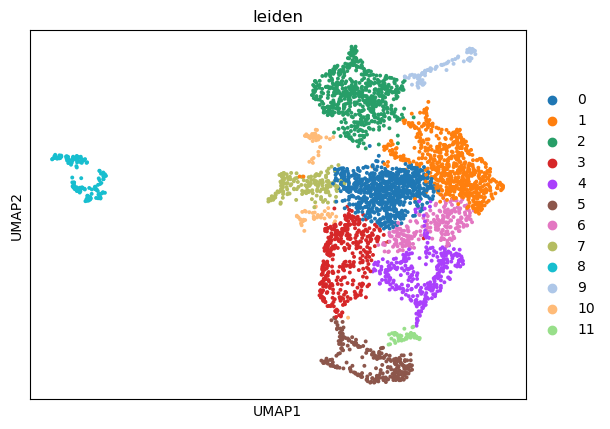

In [10]:
sc.pp.neighbors(mibitof_adata_filtered)
sc.tl.umap(mibitof_adata_filtered)
sc.tl.leiden(mibitof_adata_filtered, resolution=0.5)
sc.pl.umap(mibitof_adata_filtered, color="leiden")

In [11]:
mibitof_adata_filtered.uns["spatialdata_attrs"] = {
    "region": ["point8_labels", "point16_labels", "point23_labels"],
    "region_key": "region",
    "instance_key": "label_id",
}

mibitof_sdata.tables["morphology"] = TableModel.parse(mibitof_adata_filtered)

/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'point16_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'point23_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'point16_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'point23_labels', which is not present in the SpatialD

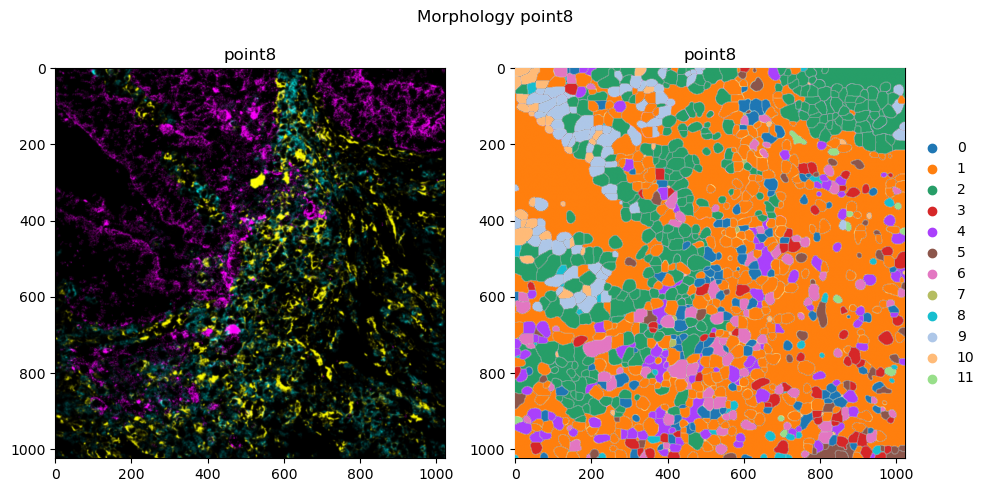

/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'point8_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'point23_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'point8_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'point23_labels', which is not present in the SpatialDat

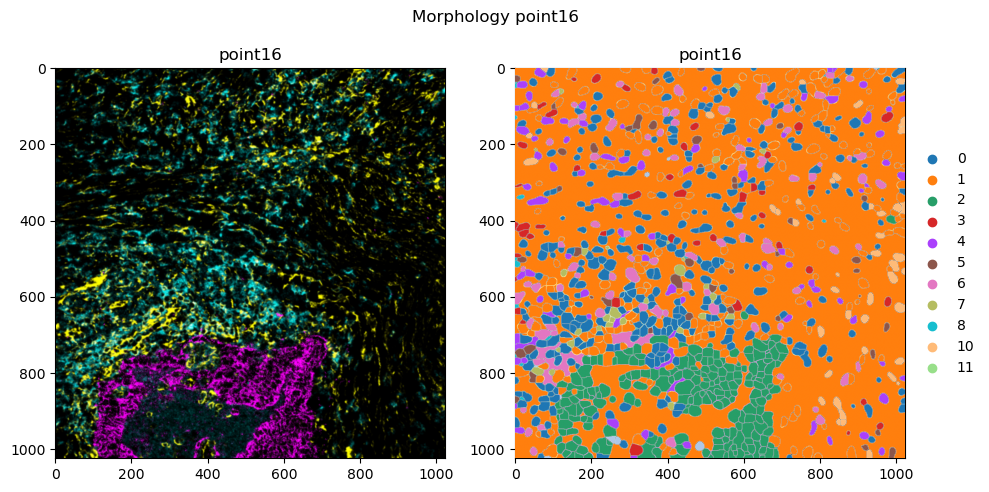

/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'point8_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'point16_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'point8_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/spatialdata/_core/spatialdata.py:185: UserWarning: The table is annotating 'point16_labels', which is not present in the SpatialDat

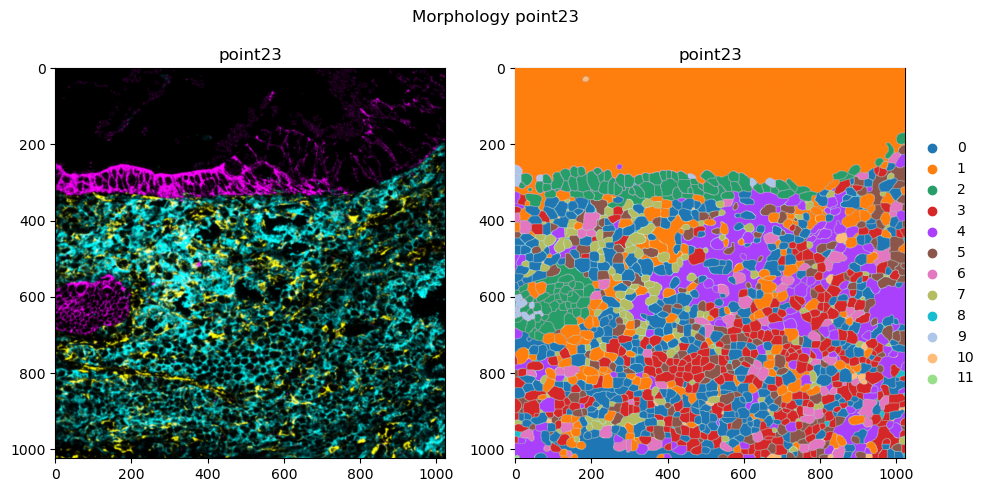

In [17]:
for point in ["point8", "point16", "point23"]:

    _, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    mibitof_sdata.pl.render_images().pl.show(coordinate_systems=point, ax=axs[0])

    mibitof_sdata.pl.render_images().pl.render_labels(
        color="leiden",
        groups=[str(i) for i in range(len(mibitof_adata_filtered.uns["leiden_colors"]))],
        palette=mibitof_adata_filtered.uns["leiden_colors"],
        table_name="morphology",
        fill_alpha=1,
    ).pl.show(coordinate_systems=point, ax=axs[1])
    
    plt.suptitle(f"Morphology {point}")
    plt.tight_layout()
    plt.show()

## Using shapes (f.e. Visium spots)

In [3]:
visium_sdata = sq.datasets.visium_hne_sdata()
visium_sdata

SpatialData object, with associated Zarr store: /Users/tim.treis/.cache/squidpy/visium_hne_sdata.zarr
├── Images
│     └── 'hne': DataTree[cyx] (3, 11757, 11291), (3, 5878, 5645), (3, 2939, 2822), (3, 1469, 1411)
├── Shapes
│     └── 'spots': GeoDataFrame shape: (2688, 2) (2D shapes)
└── Tables
      └── 'adata': AnnData (2688, 18078)
with coordinate systems:
    ▸ 'global', with elements:
        hne (Images), spots (Shapes)

In [4]:
sq.exp.calculate_image_features(
    sdata=visium_sdata,
    image_key="hne",
    scale="scale0",
    shapes_key="spots",
    adata_key_added="morphology",
    measurements=[
        # "skimage:label",  # these are all the same because they're the visium spot circles
        "skimage:label+image",
        "cpmeasure:core",
        "cpmeasure:correlation",
    ],
    n_jobs=24,
    show_progress_bar=True,
    inplace=True,
)

INFO     Converting shapes to labels (using scale 'scale0').                                                       
INFO     Using '24' core(s).                                                                                       
INFO     Calculating 'skimage' image features for channel '0'.                                                     


  0%|          | 0/2688 [00:00<?, ?/s]

INFO     Calculating 'skimage' image features for channel '1'.                                                     


  0%|          | 0/2688 [00:00<?, ?/s]

INFO     Calculating 'skimage' image features for channel '2'.                                                     


  0%|          | 0/2688 [00:00<?, ?/s]

INFO     Calculating 'cpmeasure' core features for channel '0'.                                                    


  0%|          | 0/2688 [00:00<?, ?/s]

INFO     Calculating 'cpmeasure' core features for channel '1'.                                                    


  0%|          | 0/2688 [00:00<?, ?/s]

INFO     Calculating 'cpmeasure' core features for channel '2'.                                                    


  0%|          | 0/2688 [00:00<?, ?/s]

INFO     Calculating 'cpmeasure' correlation features between channels '0' and '1'.                                


  0%|          | 0/2688 [00:00<?, ?/s]

INFO     Calculating 'cpmeasure' correlation features between channels '0' and '2'.                                


  0%|          | 0/2688 [00:00<?, ?/s]

INFO     Calculating 'cpmeasure' correlation features between channels '1' and '2'.                                


  0%|          | 0/2688 [00:00<?, ?/s]

/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/scanpy/tools/_utils.py:40: UserWarning: You’re trying to run this on 933 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(
/var/folders/qg/qgc908995g3fc8qtss2fsbhhxyxxj4/T/ipykernel_42214/393114612.py:8: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(visium_sdata.tables["morphology"], resolution=0.2)


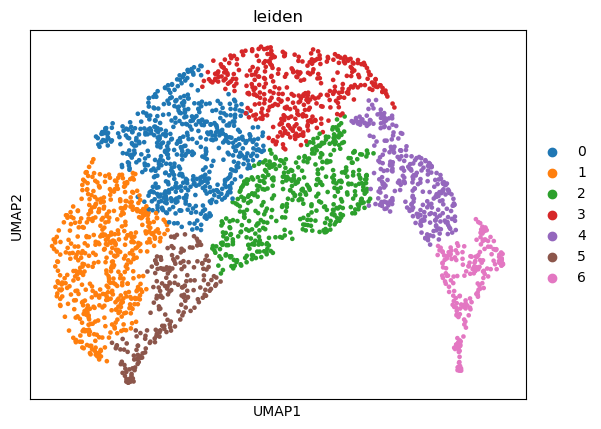

In [6]:
try:
    del visium_sdata.tables["morphology"].uns["leiden_colors"]
except:
    pass

sc.pp.neighbors(visium_sdata.tables["morphology"])
sc.tl.umap(visium_sdata.tables["morphology"])
sc.tl.leiden(visium_sdata.tables["morphology"], resolution=0.2)
sc.pl.umap(visium_sdata.tables["morphology"], color="leiden")

### Apply PyCytoMiner

In [7]:
visium_sdata.tables["morphology"].var_names_make_unique()

data = visium_sdata.tables["morphology"].to_df()

scaler = RobustMAD(epsilon=1e-18)
fitted_scaler = scaler.fit(data)
fitted_scaled = fitted_scaler.transform(data)

data_scaled = pd.DataFrame(
    fitted_scaled,
    columns=data.columns,
    index=data.index,
)
data_scaled

intensity_min_0  intensity_std_0  intensity_mean_0  \
cell_1            0.899321        -0.579041         -0.558058   
cell_2           -0.112415         0.014689          0.561017   
cell_3            1.011736        -1.808093          1.164713   
cell_4            0.337245        -1.876213          1.345783   
cell_5            1.911057        -1.237280          0.748007   
...                    ...              ...               ...   
cell_2684        -1.573812         2.847116         -3.099154   
cell_2685        -0.562076         1.164312         -1.045893   
cell_2686        -0.224830         0.315217         -0.307051   
cell_2687         1.236566        -1.496693          0.742661   
cell_2688        -0.337245        -0.255616          0.978105   

           intensity_max_0  intensity_std_1  intensity_max_1  \
cell_1            0.299774        -0.726427         0.867202   
cell_2           -0.224830        -0.935549        -1.445337   
cell_3           -2.173359        -2.147201        -0.963558   
cell_4           -0.824378        -0.741166        -0.385423   
cell_5           -0.374717        -1.083257        -0.433601   
...                    ...              ...              ...   
cell_2684         0.224830         1.965472        -0.096356   
cell_2685         0.224830         0.966329         0.481779   
cell_2686        -0.899321        -0.127257        -0.674491   
cell_2687        -0.674491        -1.332098        -1.204448   
cell_2688         1.124151         0.387398         1.589871   

           intensity_mean_1  intensity_min_1  intensity_std_2  \
cell_1            -0.095271         0.843113        -0.243377   
cell_2            -1.818115        -0.843113        -0.312850   
cell_3             1.395489         2.023472        -2.118267   
cell_4             0.474836         0.337245        -0.525949   
cell_5             0.234998         0.505868        -1.436904   
...                     ...              ...              ...   
cell_2684         -1.025682        -1.517604         1.547430   
cell_2685          0.367628        -0.505868         0.347943   
cell_2686          0.148927        -0.168623        -0.548380   
cell_2687         -0.263536        -0.674491        -1.317662   
cell_2688          1.926718         0.000000        -0.563190   

           intensity_max_2  ...  inertia_tensor_eigvals_1_1_2  \
cell_1            0.562076  ...                           0.0   
cell_2           -0.618283  ...                           0.0   
cell_3           -1.967265  ...                           0.0   
cell_4           -0.168623  ...                           0.0   
cell_5           -1.011736  ...                           0.0   
...                    ...  ...                           ...   
cell_2684         0.674491  ...                           0.0   
cell_2685        -0.056208  ...                           0.0   
cell_2686        -1.405189  ...                           0.0   
cell_2687        -0.899321  ...                           0.0   
cell_2688         0.168623  ...                           0.0   

           area_convex_1_2  Correlation_Costes_1_1_2  \
cell_1                 0.0              0.000000e+00   
cell_2                 0.0              0.000000e+00   
cell_3                 0.0              0.000000e+00   
cell_4                 0.0              0.000000e+00   
cell_5                 0.0              0.000000e+00   
...                    ...                       ...   
cell_2684              0.0             -6.861766e+14   
cell_2685              0.0              0.000000e+00   
cell_2686              0.0              0.000000e+00   
cell_2687              0.0             -4.443496e+13   
cell_2688              0.0              0.000000e+00   

           Correlation_Costes_2_1_2  Correlation_Pearson_1_2  \
cell_1                          0.0                -1.809624   
cell_2                          0.0                -0.475606   
cell_3                          0.

In [18]:
feature_select_opts = [
    # "variance_threshold",
    "drop_na_columns",
    "correlation_threshold",
    "blocklist",
    "drop_outliers",
]

data_scaled_filtered = pycytominer.feature_select(
    profiles=data_scaled,
    features=data_scaled.columns.tolist(),
    samples="all",
    operation=feature_select_opts,
)
data_scaled_filtered

/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


intensity_max_2  intensity_max_0-1  \
cell_1            0.562076           0.299774   
cell_2           -0.618283          -0.224830   
cell_3           -1.967265          -2.173359   
cell_4           -0.168623          -0.824378   
cell_5           -1.011736          -0.374717   
...                    ...                ...   
cell_2684         0.674491           0.224830   
cell_2685        -0.056208           0.224830   
cell_2686        -1.405189          -0.899321   
cell_2687        -0.899321          -0.674491   
cell_2688         0.168623           1.124151   

           RadialDistribution_MeanFrac_1of4_0  \
cell_1                               0.369524   
cell_2                               0.618612   
cell_3                               0.319778   
cell_4                               0.597437   
cell_5                               0.315908   
...                                       ...   
cell_2684                            0.304025   
cell_2685                            0.072182   
cell_2686                            1.581478   
cell_2687                           -0.050812   
cell_2688                            1.662210   

           RadialDistribution_RadialCV_1of4_0  \
cell_1                              -2.241729   
cell_2                              -0.163590   
cell_3                               1.240338   
cell_4                               0.315840   
cell_5                               0.023838   
...                                       ...   
cell_2684                            0.157261   
cell_2685                           -1.545546   
cell_2686                           -1.624536   
cell_2687                           -0.044338   
cell_2688                            0.157323   

           RadialDistribution_MeanFrac_2of4_0  \
cell_1                              -0.697623   
cell_2                              -0.744052   
cell_3                               0.299827   
cell_4                               0.934791   
cell_5                               1.144397   
...                                       ...   
cell_2684                           -0.373344   
cell_2685                           -1.309177   
cell_2686                           -1.638646   
cell_2687                           -0.592088   
cell_2688                           -1.652917   

           RadialDistribution_RadialCV_2of4_0  \
cell_1                               3.720066   
cell_2                              -0.162480   
cell_3                              -1.682927   
cell_4                               0.827373   
cell_5                               1.874191   
...                                       ...   
cell_2684                            1.324136   
cell_2685                           -2.027059   
cell_2686                           -0.635012   
cell_2687                            0.810925   
cell_2688                           -0.199390   

           RadialDistribution_MeanFrac_3of4_0  \
cell_1                               0.590665   
cell_2                              -0.179282   
cell_3                              -0.457882   
cell_4                              -1.717733   
cell_5                              -1.017107   
...                                       ...   
cell_2684                            0.566821   
cell_2685                           -0.665661   
cell_2686                            0.796247   
cell_2687                           -1.372496   
cell_2688                            0.160823   

           RadialDistribution_RadialCV_3of4_0  \
cell_1                               0.108132   
cell_2                              -0.707589   
cell_3                              -2.665925   
cell_4                              -1.048509   
cell_5                              -2.100029   
...                                       ...   
cell_2684                            0.145216   
cell_2685                            0.726426   
cell_2686                           

In [19]:
visium_adata_filtered = ad.AnnData(
    X=data_scaled_filtered,
    obs=visium_sdata.tables["morphology"].obs,
)
visium_adata_filtered

AnnData object with n_obs × n_vars = 2688 × 673
    obs: 'region', 'label_id', 'leiden'

/Users/tim.treis/anaconda3/envs/spatialdata-workshop/lib/python3.11/site-packages/scanpy/tools/_utils.py:40: UserWarning: You’re trying to run this on 673 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


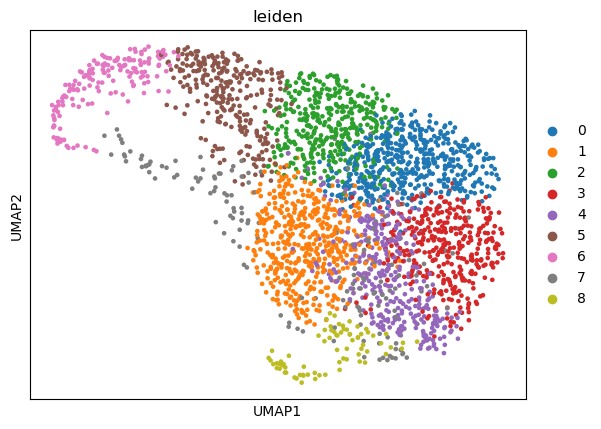

In [20]:
del visium_adata_filtered.obs["leiden"]

sc.pp.neighbors(visium_adata_filtered)
sc.tl.umap(visium_adata_filtered)
sc.tl.leiden(visium_adata_filtered)
sc.pl.umap(visium_adata_filtered, color="leiden")

In [21]:
visium_adata_filtered.uns["spatialdata_attrs"] = {
    "region": "spots",
    "region_key": "region",
    "instance_key": "label_id",
}

visium_sdata.tables["morphology_filtered"] = TableModel.parse(visium_adata_filtered)

/Users/tim.treis/Documents/GitHub/spatialdata/src/spatialdata/_core/_elements.py:125: UserWarning: Key `morphology_filtered` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


In [24]:
sc.pp.neighbors(visium_sdata.tables["adata"])
sc.tl.umap(visium_sdata.tables["adata"])
sc.tl.leiden(visium_sdata.tables["adata"])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.04347826..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.04347826..1.0].
/Users/tim.treis/Documents/GitHub/spatialdata-plot/src/spatialdata_plot/pl/utils.py:789: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_mapping)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.04347826..1.0].
/Users/tim.treis/Documents/GitHub/spatialdata-plot/src/spatialdata_plot/pl/utils.py:789: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is depre

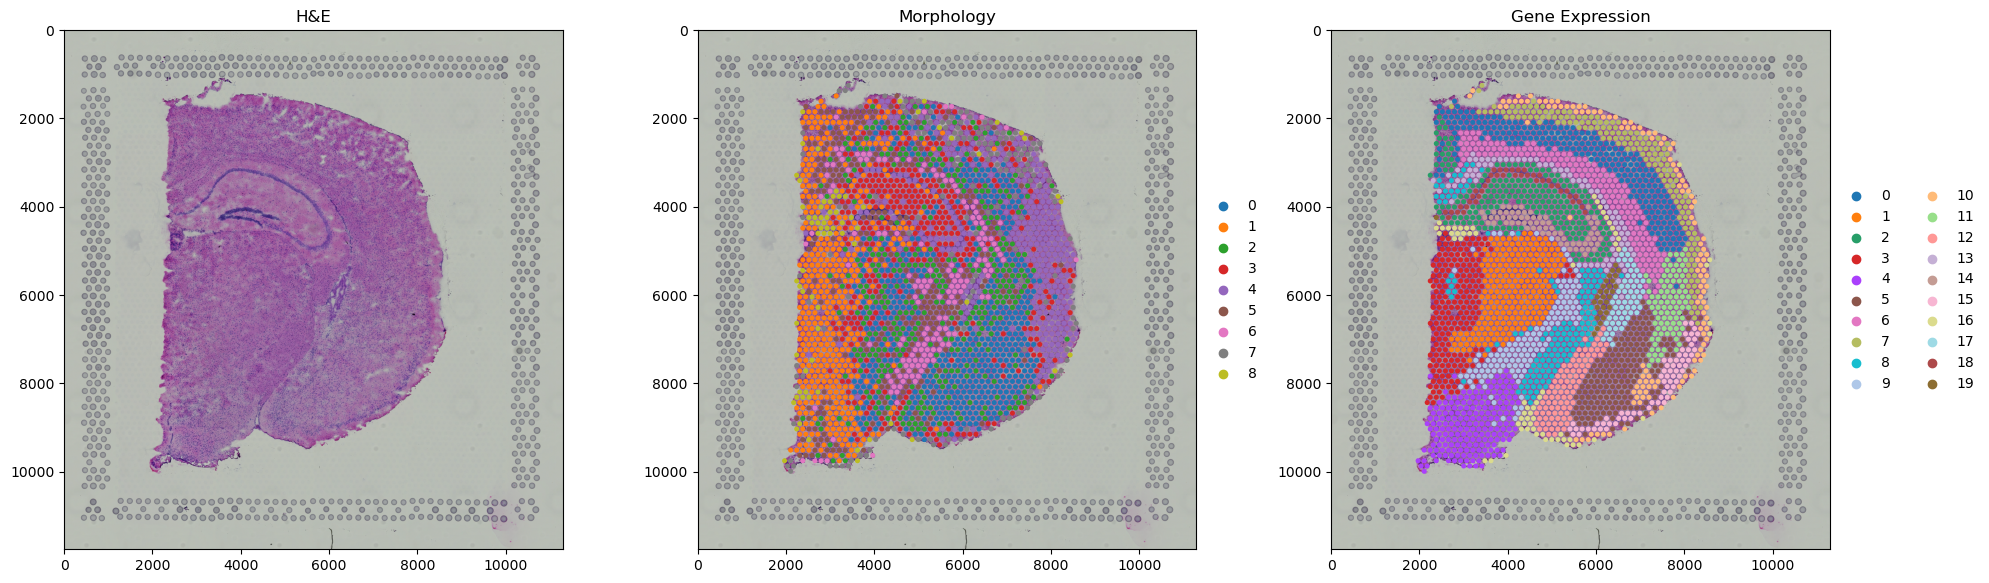

In [28]:
_, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))

(visium_sdata.pl.render_images().pl.show(ax=axs[0], title="H&E"))

(
    visium_sdata.pl.render_images()
    .pl.render_shapes(
        color="leiden",
        table_name="morphology_filtered",
        scale=1.5,
    )
    .pl.show(ax=axs[1], title="Morphology")
)

(
    visium_sdata.pl.render_images()
    .pl.render_shapes(
        color="leiden",
        table_name="adata",
        scale=1.5,
    )
    .pl.show(ax=axs[2], title="Gene Expression")
)

plt.tight_layout()
plt.show()